In [1]:
# !pip install -U kaleido

In [2]:
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
from IPython.display import Image

In [3]:
df = pd.read_excel('Omnify-Analyst-Intership-Task.xlsx')

In [4]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country'],
      dtype='object')

In [5]:
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,$980,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,NaN,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,"$1,188",2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,NaN,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,NaN,NaT,USA


In [6]:
df.loc[:, 'Payment ($)'] = df.loc[:, 'Payment ($)'].fillna('0')
df.loc[:, 'Payment ($)'] = df.loc[:, 'Payment ($)'].apply(lambda x: float(x.replace('$', '').replace(',', '')))
df['Payment ($)'] = df['Payment ($)'].astype(float)

In [7]:
df

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaT,USA
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaT,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,2021-05-03,EK_Generic_Swimming,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,0,1,0.00,0,0,0.0,NaT,USA
414,2021-05-03,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Exact,Exact,yoga studio booking software,USD,0,6,0.00,0,0,0.0,NaT,USA
415,2021-05-03,EK_Generic_Tri-Tok_Reservation,Reservation_Management_System_Exact,Exact,reservation management system,USD,0,0,0.00,0,0,0.0,NaT,USA
416,2021-05-03,EK_Generic_Quad-Tok_Pilates,Pilates_Studio_Booking_Software_Broad,Broad,pilates studio booking software,USD,0,1,0.00,0,0,0.0,NaT,USA


In [8]:
df['Month'] = df['Week'].dt.month

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Week            418 non-null    datetime64[ns]
 1   Campaign        418 non-null    object        
 2   Ad group        418 non-null    object        
 3   Keyword type    418 non-null    object        
 4   Search Keyword  412 non-null    object        
 5   Currency        418 non-null    object        
 6   Clicks          418 non-null    int64         
 7   Impressions     418 non-null    int64         
 8   Cost ($)        418 non-null    float64       
 9   Leads           418 non-null    int64         
 10  Prospects       418 non-null    int64         
 11  Payment ($)     418 non-null    float64       
 12  Payment Date    8 non-null      datetime64[ns]
 13  Country         418 non-null    object        
 14  Month           418 non-null    int32         
dtypes: dat

### Create a combined report with all key metrics (esp: Spends and Returns %) in a weekly and monthly format. Decide the number of data fields you would like to showcase here.

In [10]:
df2 = df.select_dtypes(['int', 'float', 'datetime64[ns]']).drop(['Payment Date', 'Month'], axis=1)
df2 = df2.groupby('Week').sum()
df2.head()

,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($)
Week,,,,,,
2021-01-25,15,319,154.79,1,2,2168.0
2021-02-01,19,373,192.58,0,1,0.0
2021-02-08,21,364,216.13,0,1,980.0
2021-02-15,35,671,235.30,0,2,1788.0
2021-02-22,22,478,190.90,0,1,0.0


In [11]:
df2_2 = df2.reset_index()
df2_2['Month'] = df2_2['Week'].dt.month
df2_2.head()

,Week,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Month
0,2021-01-25,15,319,154.79,1,2,2168.0,1
1,2021-02-01,19,373,192.58,0,1,0.0,2
2,2021-02-08,21,364,216.13,0,1,980.0,2
3,2021-02-15,35,671,235.30,0,2,1788.0,2
4,2021-02-22,22,478,190.90,0,1,0.0,2


### Spends (Week)

In [12]:
df3 = df2.reset_index()
df3 = df3[['Week', 'Cost ($)']].sort_values('Cost ($)', ascending=False)
df3.iloc[0:5]

,Week,Cost ($)
8,2021-03-22,308.73
6,2021-03-08,258.20
3,2021-02-15,235.30
14,2021-05-03,229.37
2,2021-02-08,216.13


### Returns % (Week)

In [13]:
df3 = df2.reset_index()
df3 = df3[['Week', 'Cost ($)', 'Payment ($)']]
df3['Returns %'] = round((df3['Payment ($)'] - df3['Cost ($)']) * 100 / (df3['Cost ($)']), 3)
df3.sort_values('Returns %', ascending=False).iloc[0:5]

,Week,Cost ($),Payment ($),Returns %
11,2021-04-12,137.21,2388.0,1640.398
0,2021-01-25,154.79,2168.0,1300.607
8,2021-03-22,308.73,2388.0,673.491
3,2021-02-15,235.30,1788.0,659.881
5,2021-03-01,141.40,980.0,593.069


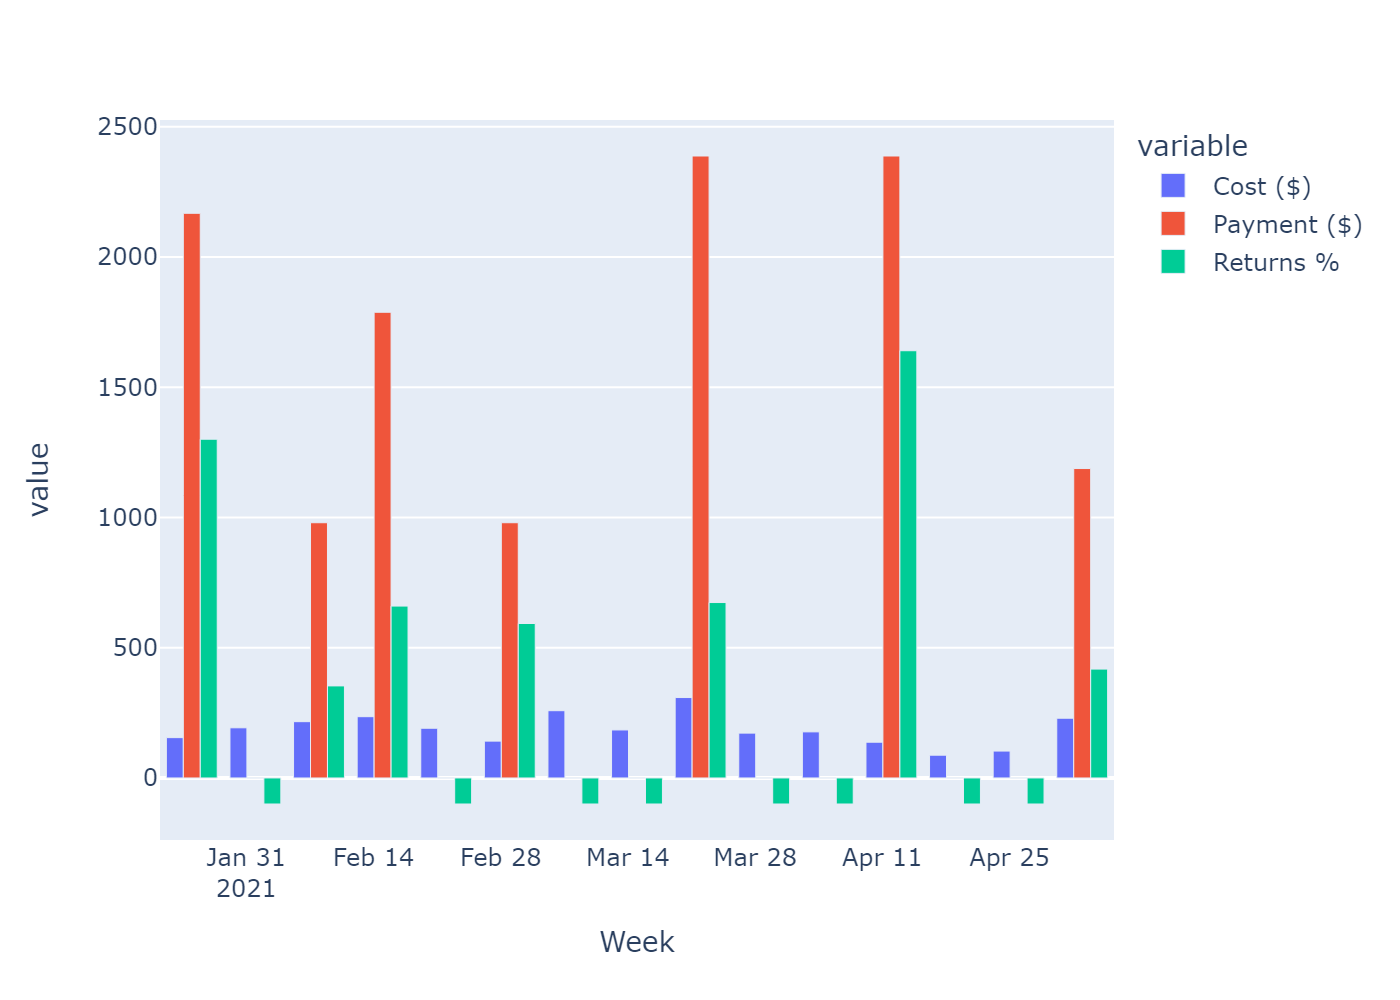

In [14]:
df3 = df3.set_index('Week')
fig = px.bar(data_frame=df3, barmode='group')
Image(fig.to_image(format="png", scale=2))

### Spends (Month)

In [15]:
df3 = df2_2
df3 = df3[['Month', 'Cost ($)']].sort_values('Cost ($)', ascending=False)
df3.iloc[0:5]

,Month,Cost ($)
8,3,308.73
6,3,258.20
3,2,235.30
14,5,229.37
2,2,216.13


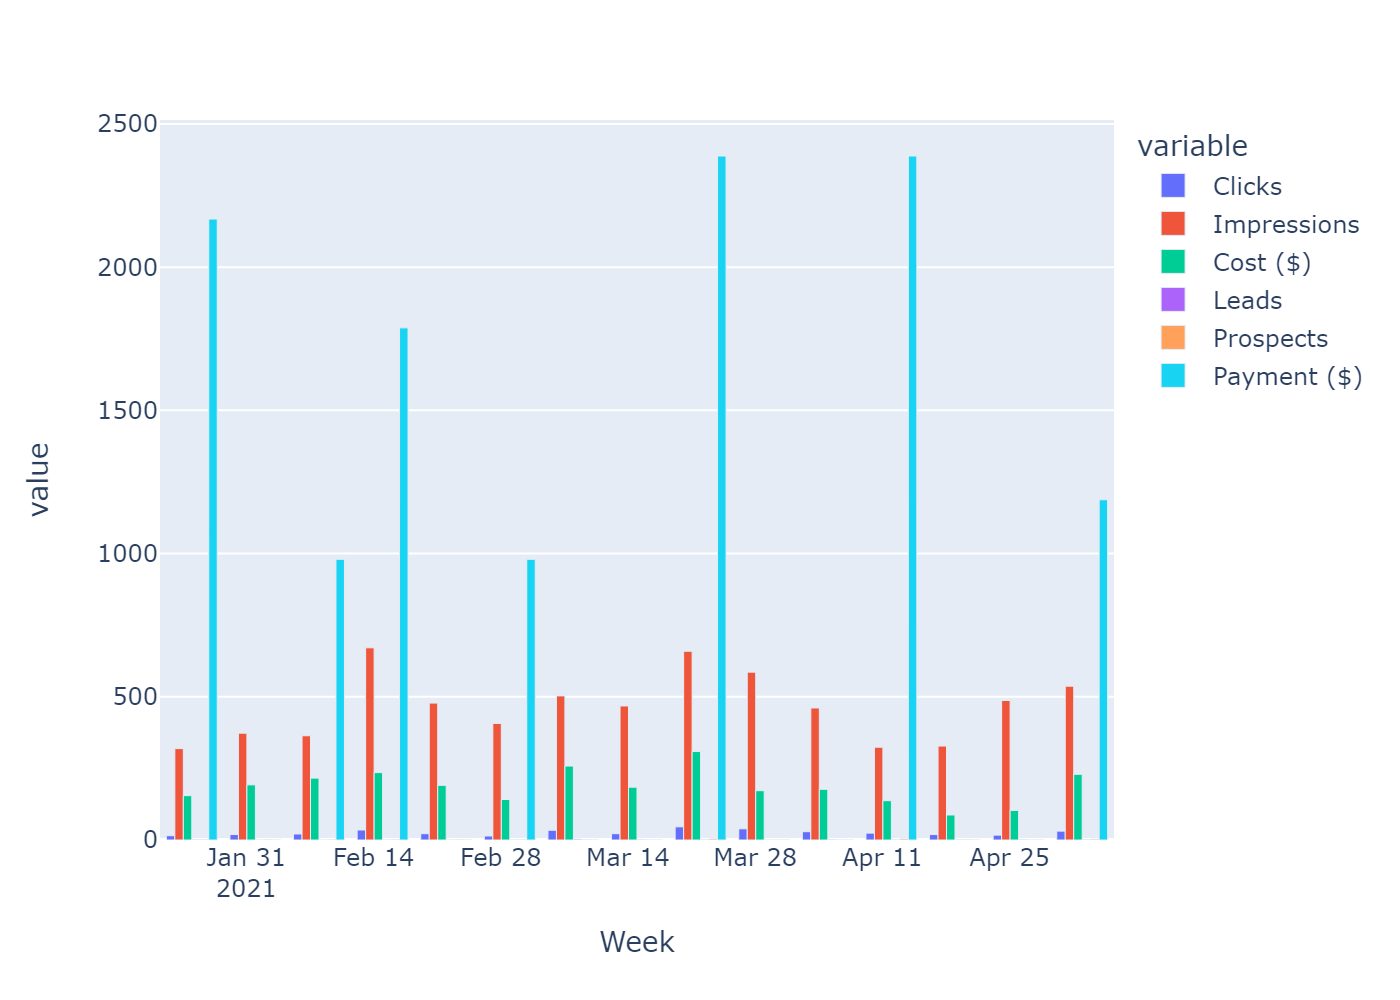

In [16]:
fig = px.bar(data_frame=df2_2,
             x='Week', y=['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects', 'Payment ($)'],
             barmode='group')
Image(fig.to_image(format="png",scale=2))

### Returns % (Month)

In [17]:
df3 = df2_2
df3 = df3[['Month', 'Cost ($)', 'Payment ($)']]
df3['Returns %'] = round((df3['Payment ($)'] - df3['Cost ($)']) * 100 / (df3['Cost ($)']), 3)
df3.sort_values('Returns %', ascending=False).iloc[0:5]

C:\Users\vadhi\AppData\Local\Temp\ipykernel_11256\2692876774.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Month,Cost ($),Payment ($),Returns %
11,4,137.21,2388.0,1640.398
0,1,154.79,2168.0,1300.607
8,3,308.73,2388.0,673.491
3,2,235.30,1788.0,659.881
5,3,141.40,980.0,593.069


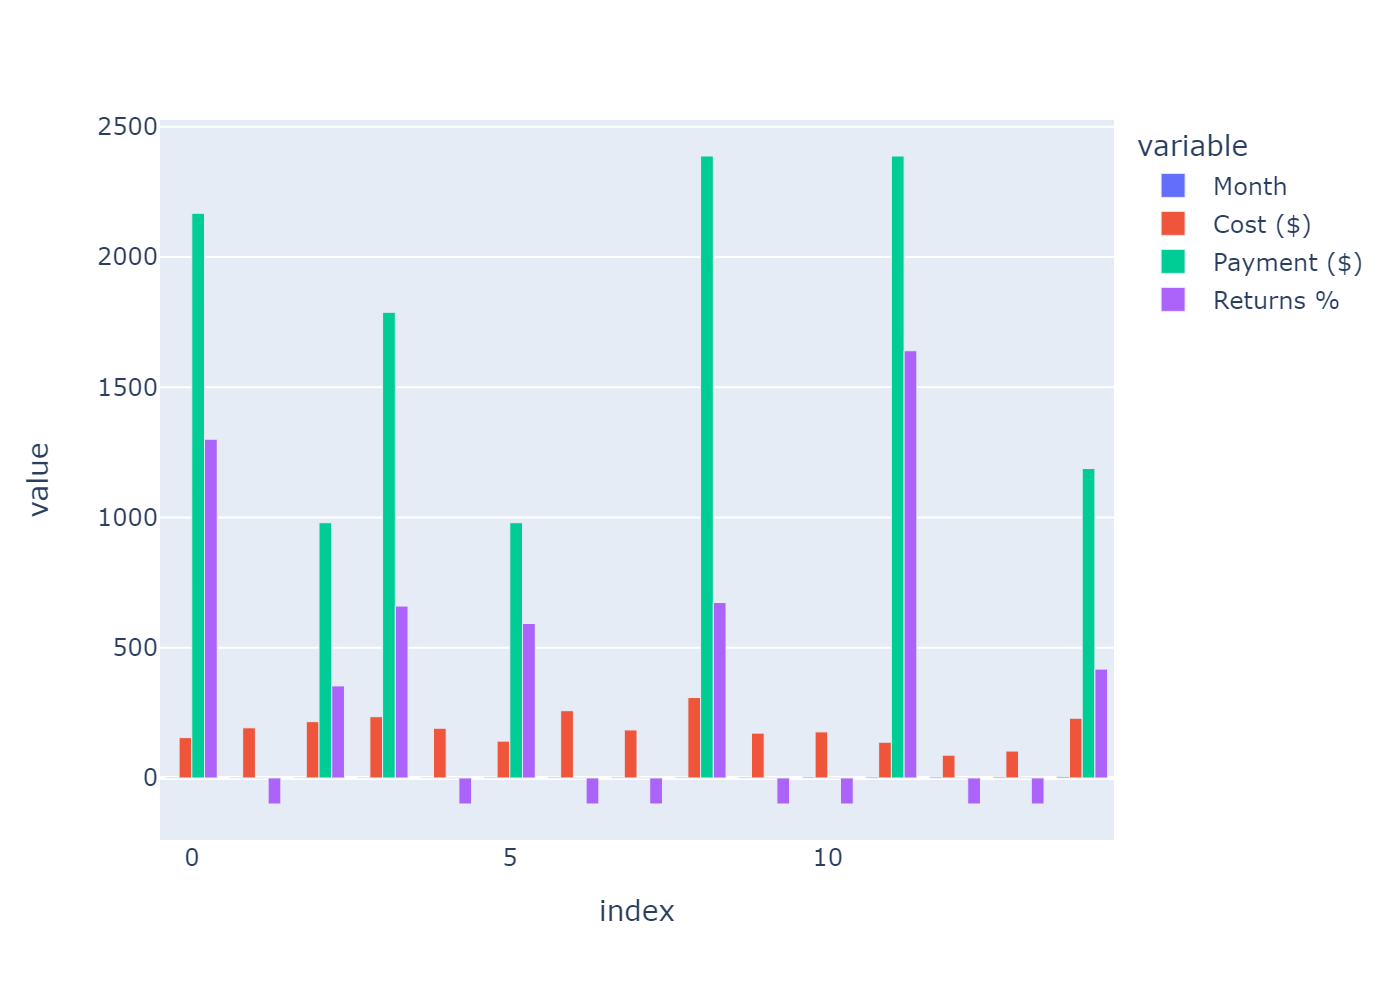

In [18]:
fig = px.bar(data_frame=df3, barmode='group')
Image(fig.to_image(format="png",scale=2))

In [19]:
df3.columns

Index(['Month', 'Cost ($)', 'Payment ($)', 'Returns %'], dtype='object')

In [20]:
df3 = df.select_dtypes(['int', 'float'])
df3 = df3.groupby('Month').sum()
df3

,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($)
Month,,,,,,
1,15,319,154.79,1,2,2168.0
2,97,1886,834.91,0,5,2768.0
3,155,2623,1064.80,5,6,3368.0
4,89,1600,504.81,5,5,2388.0
5,31,537,229.37,1,3,1188.0


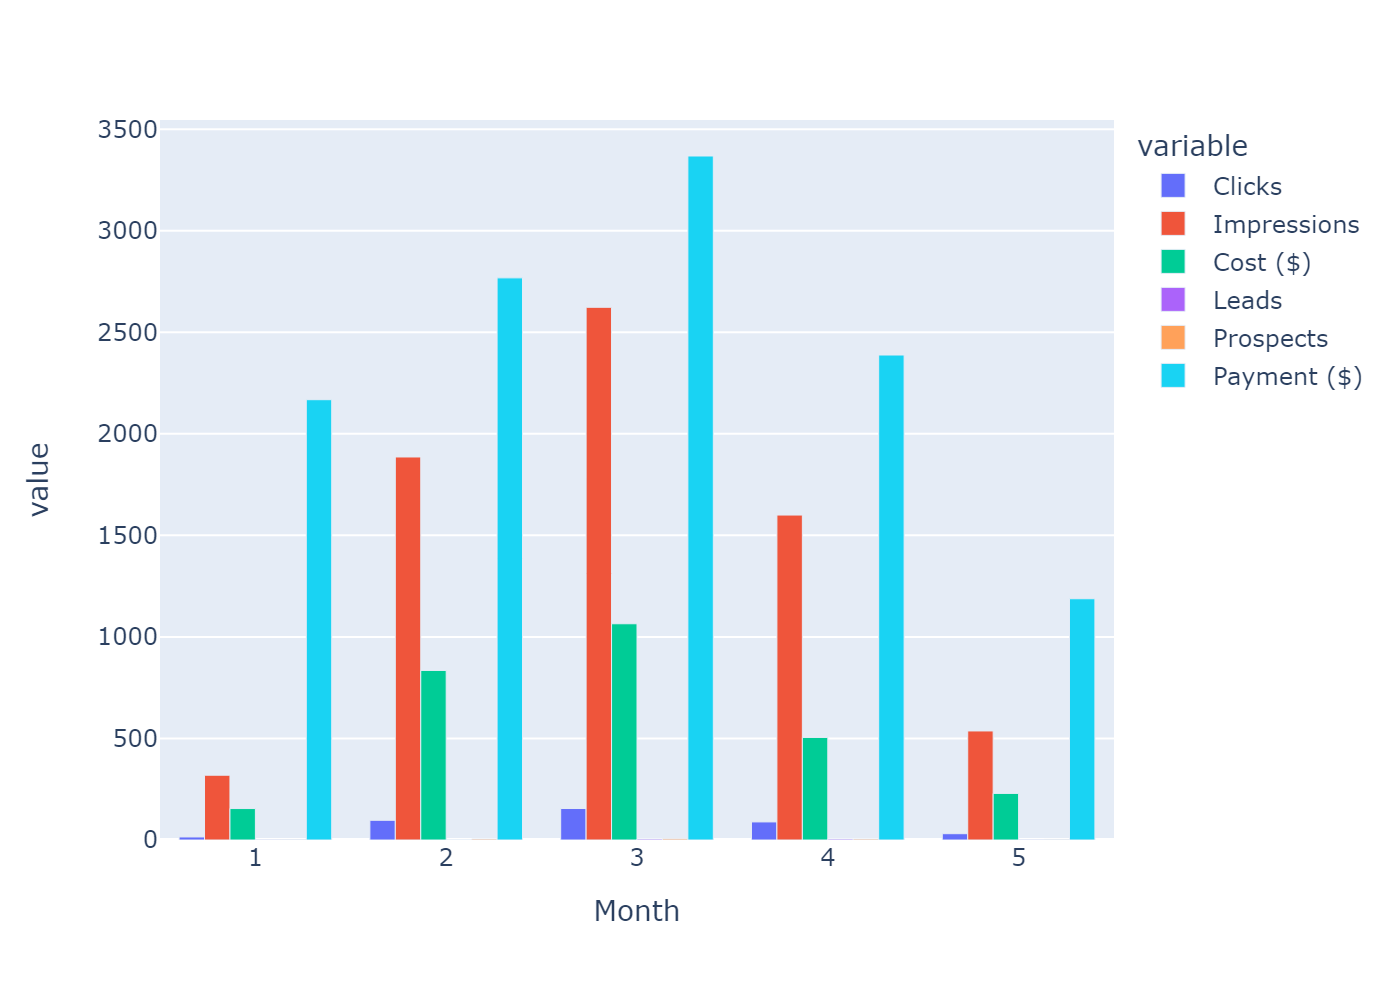

In [21]:
fig = px.bar(data_frame=df3.reset_index(), 
             x='Month', y=['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects', 'Payment ($)'],
             barmode='group')
Image(fig.to_image(format="png",scale=2))

### Which is the most profitable channel

In [22]:
df.head(3)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1


In [23]:
df['Campaign'].unique()

array(['EK_Generic_Swimming', 'EK_Generic_Quad-Tok_Yoga',
       'EK_Generic_Swimming_UK', 'EK_Generic_Swimming_Canada',
       'EK_Generic_Tri-Tok_Reservation',
       'EK_Generic_Quad-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Reservation_Canada',
       'EK_Generic_Tri-Tok_Reservation_UK',
       'EK_Generic_Tri-Tok_Reservation_UAE',
       'EK_Generic_Tri-Tok_Reservation_Singapore',
       'EK_Generic_Quad-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga_Singapore',
       'EK_Generic_Tri-Tok_Pilates', 'EK_Generic_Tri-Tok_Yoga',
       'EK_Generic_Swimming_Singapore'], dtype=object)

In [24]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Month'],
      dtype='object')

In [25]:
profitable = df[['Campaign', 'Payment ($)']]
profitable.head()

,Campaign,Payment ($)
0,EK_Generic_Swimming,980.0
1,EK_Generic_Swimming,0.0
2,EK_Generic_Quad-Tok_Yoga,1188.0
3,EK_Generic_Swimming,0.0
4,EK_Generic_Swimming_UK,0.0


In [26]:
df4 = profitable.groupby('Campaign').sum().sort_values('Payment ($)', ascending=False)
df4[df4['Payment ($)'] != 0]

,Payment ($)
Campaign,
EK_Generic_Tri-Tok_Reservation,4176.0
EK_Generic_Swimming,3368.0
EK_Generic_Quad-Tok_Yoga,2168.0
EK_Generic_Tri-Tok_Yoga,1188.0
EK_Generic_Swimming_UK,980.0


### Which category/keyword is the most profitable

In [27]:
df.head(3)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1


In [28]:
keyword = df[['Search Keyword', 'Payment ($)']]
keyword.head()

,Search Keyword,Payment ($)
0,pool reservation system,980.0
1,pool booking app,0.0
2,yoga studio booking software,1188.0
3,pool scheduling software,0.0
4,pool reservation software,0.0


In [29]:
df5 = keyword.groupby('Search Keyword').sum().sort_values('Payment ($)', ascending=False)
df5[df5['Payment ($)'] != 0]

,Payment ($)
Search Keyword,
reservation management system,4176.0
pool reservation software,3368.0
yoga studio booking software,2168.0
yoga studio software,1188.0
pool reservation system,980.0


### Look for insights by analyzing data points on time series graphs

In [30]:
df.head()

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1
3,2021-01-25,EK_Generic_Swimming,Pool_Scheduling_Software_Phrase,Phrase,pool scheduling software,USD,2,8,23.91,0,0,0.0,NaT,USA,1
4,2021-01-25,EK_Generic_Swimming_UK,Pool_Reservation_Software_Broad,Broad,pool reservation software,USD,2,13,4.89,0,0,0.0,NaT,USA,1


In [31]:
df.select_dtypes(['float', 'int']).columns

Index(['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Month'],
      dtype='object')

In [32]:
df1 = df[['Week', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)']]
df1 = df1.groupby('Week').sum().reset_index()
df1.head()

,Week,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($)
0,2021-01-25,15,319,154.79,1,2,2168.0
1,2021-02-01,19,373,192.58,0,1,0.0
2,2021-02-08,21,364,216.13,0,1,980.0
3,2021-02-15,35,671,235.30,0,2,1788.0
4,2021-02-22,22,478,190.90,0,1,0.0


In [33]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Week         15 non-null     datetime64[ns]
 1   Clicks       15 non-null     int64         
 2   Impressions  15 non-null     int64         
 3   Cost ($)     15 non-null     float64       
 4   Leads        15 non-null     int64         
 5   Prospects    15 non-null     int64         
 6   Payment ($)  15 non-null     float64       
dtypes: datetime64[ns](1), float64(2), int64(4)
memory usage: 972.0 bytes


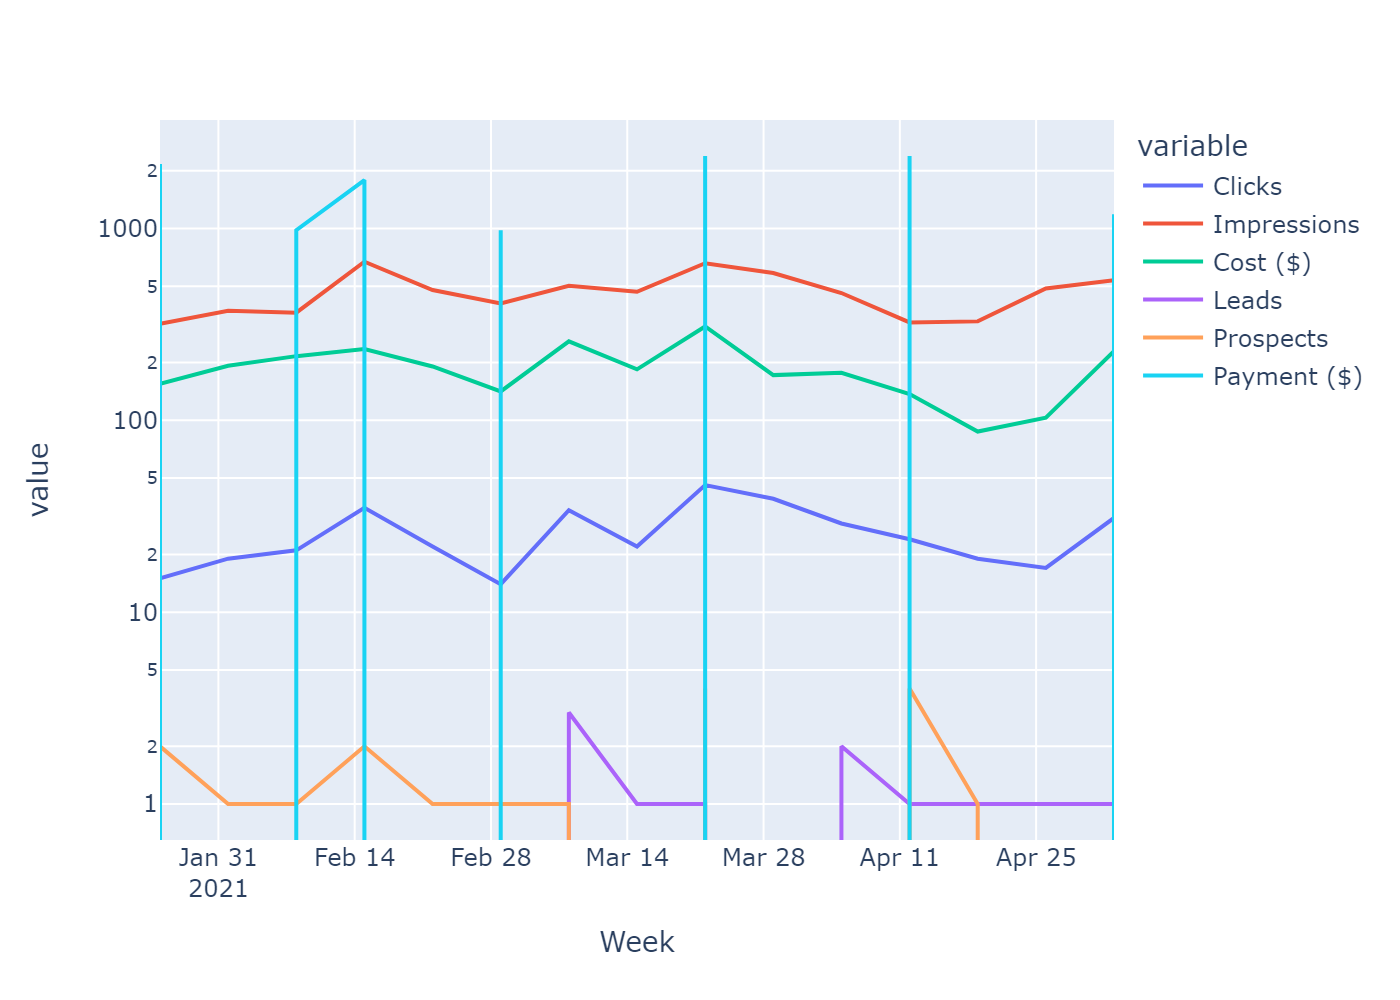

In [34]:
fig = px.line(data_frame=df1, x='Week', y=['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)'], log_y=True)
Image(fig.to_image(format="png",scale=2))

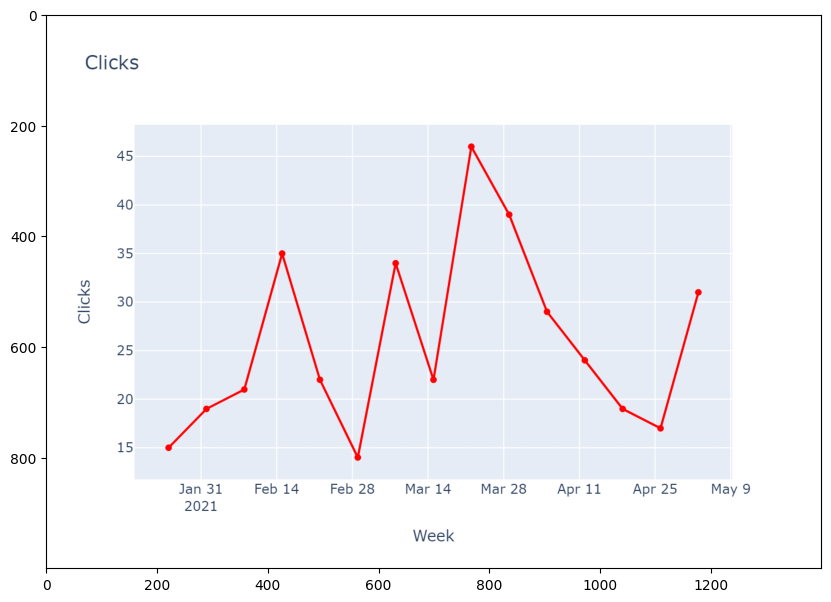

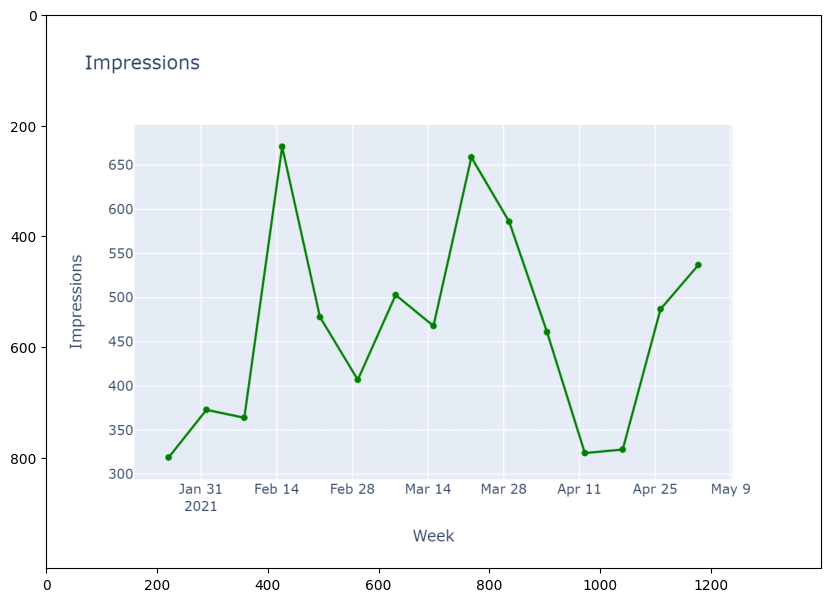

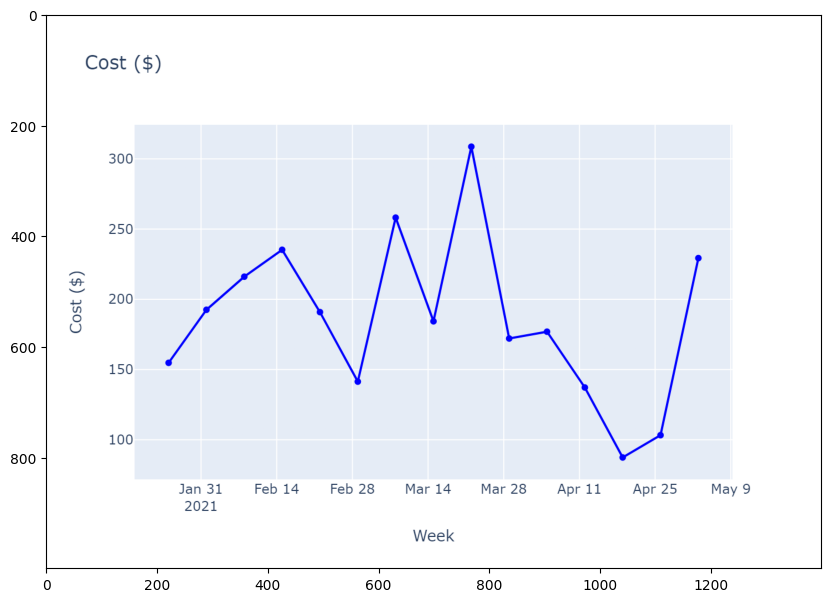

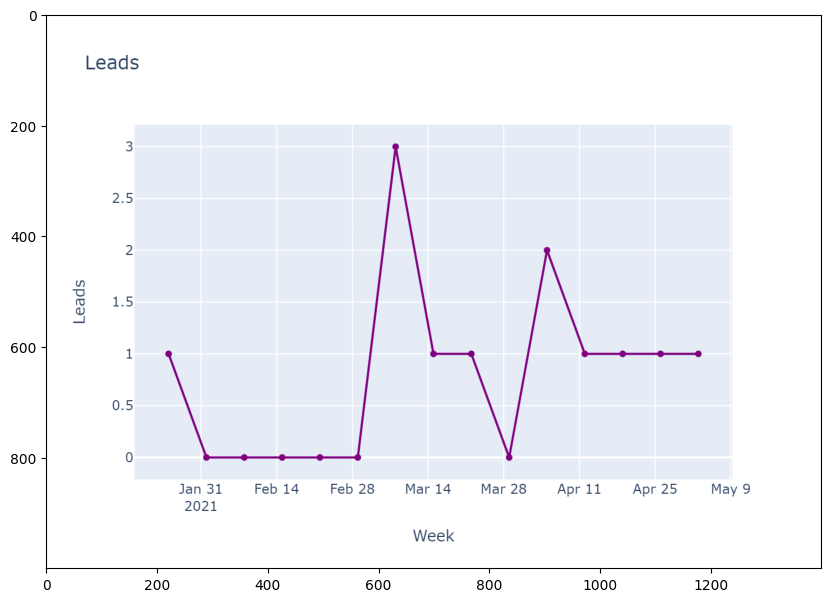

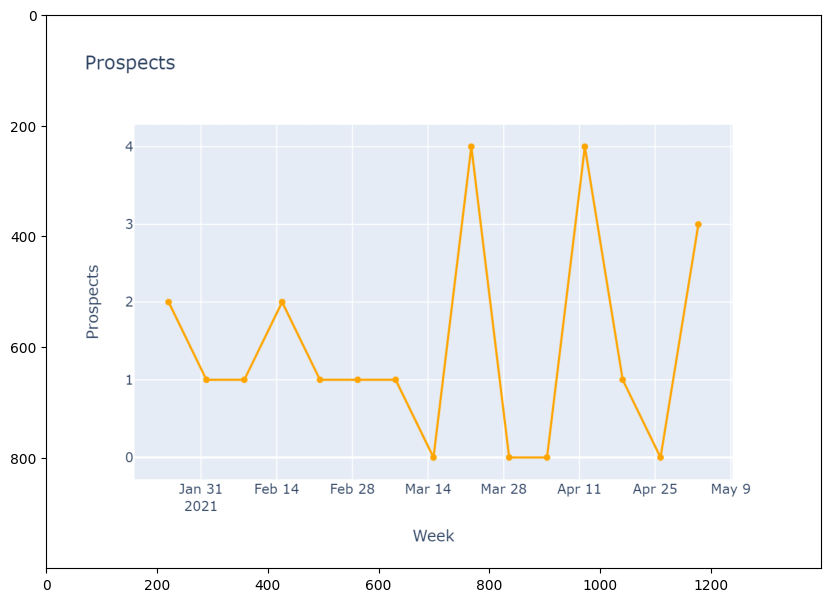

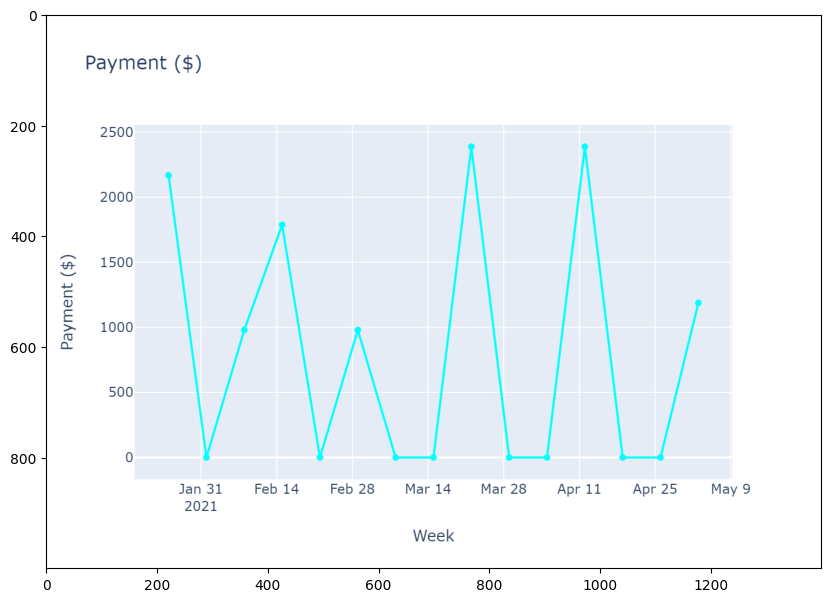

In [35]:
colors = ['red', 'green', 'blue', 'purple', 'orange', 'cyan']
for color, i in enumerate(['Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
           'Payment ($)']):
    fig = px.line(data_frame=df1, x='Week', y=i, markers=True, title=i)
    fig.update_traces(line_color=colors[color])
    fig.write_image("img.png", scale=2)
    plt.figure(figsize=(10, 10))
    plt.imshow(plt.imread('img.png'))
    plt.show()

> In this we can observe that Clicks are raising from Mar-1 to Mar-22 and clicks are coming down from Mar-22 to Apr-26.

> We get more impression at Feb-15 and Mar-22. After Mar-22 impression goes down till Apr-12. After that the impression is increasing in good amount upto May-3

> At Mar-22 we spend more cost ($)

> At Mar-8 we get more Leads.

> We get more Prospects at Mar-22 & Apr-12

> We get more Payments at Mar-22 & Apr-12

### Which search keyword gets more impression or clicks

In [36]:
df.head(3)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1


In [37]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Month'],
      dtype='object')

#### Keyword type

In [38]:
df1 = df[['Keyword type', 'Impressions', 'Clicks', 'Prospects']]
df1 = df1.groupby('Keyword type').sum()
df1

,Impressions,Clicks,Prospects
Keyword type,,,
Broad,4476,200,12
Exact,1060,99,5
Phrase,1429,88,4


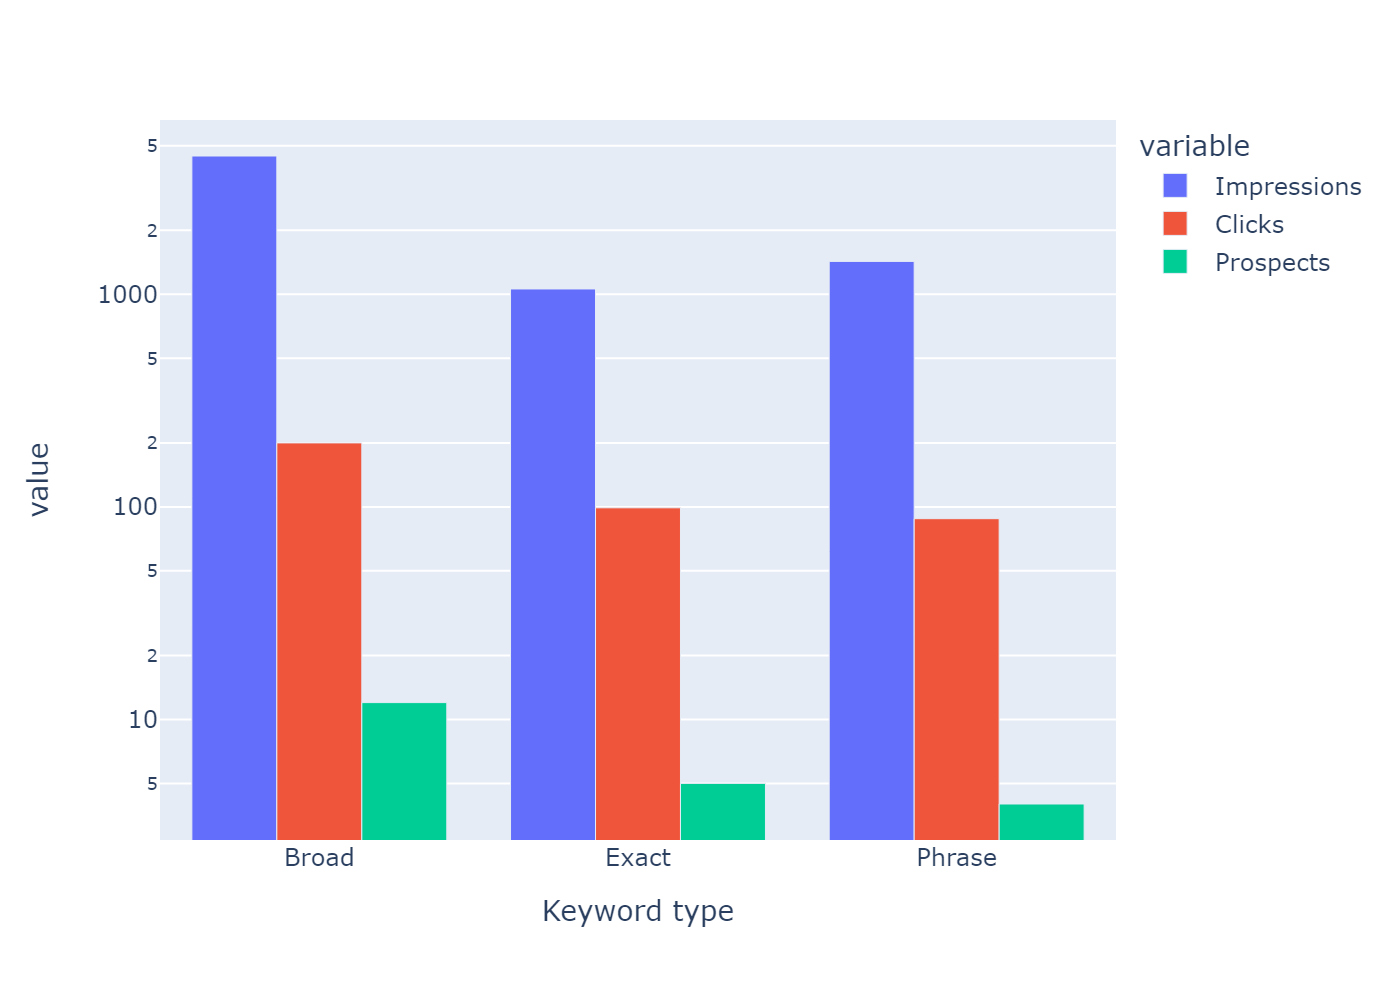

In [39]:
fig = px.bar(data_frame=df1, barmode='group', log_y=True)
Image(fig.to_image(format="png",scale=2))

#### Search Keyword

In [40]:
df1 = df[['Search Keyword', 'Impressions', 'Clicks', 'Prospects']]
df1 = df1.groupby('Search Keyword').sum()
df1.head()

,Impressions,Clicks,Prospects
Search Keyword,,,
=+pool +reservation software,1,0,0
booking management software,800,45,0
pilates booking system,5,0,0
pilates management software,0,0,0
pilates studio booking software,406,10,0


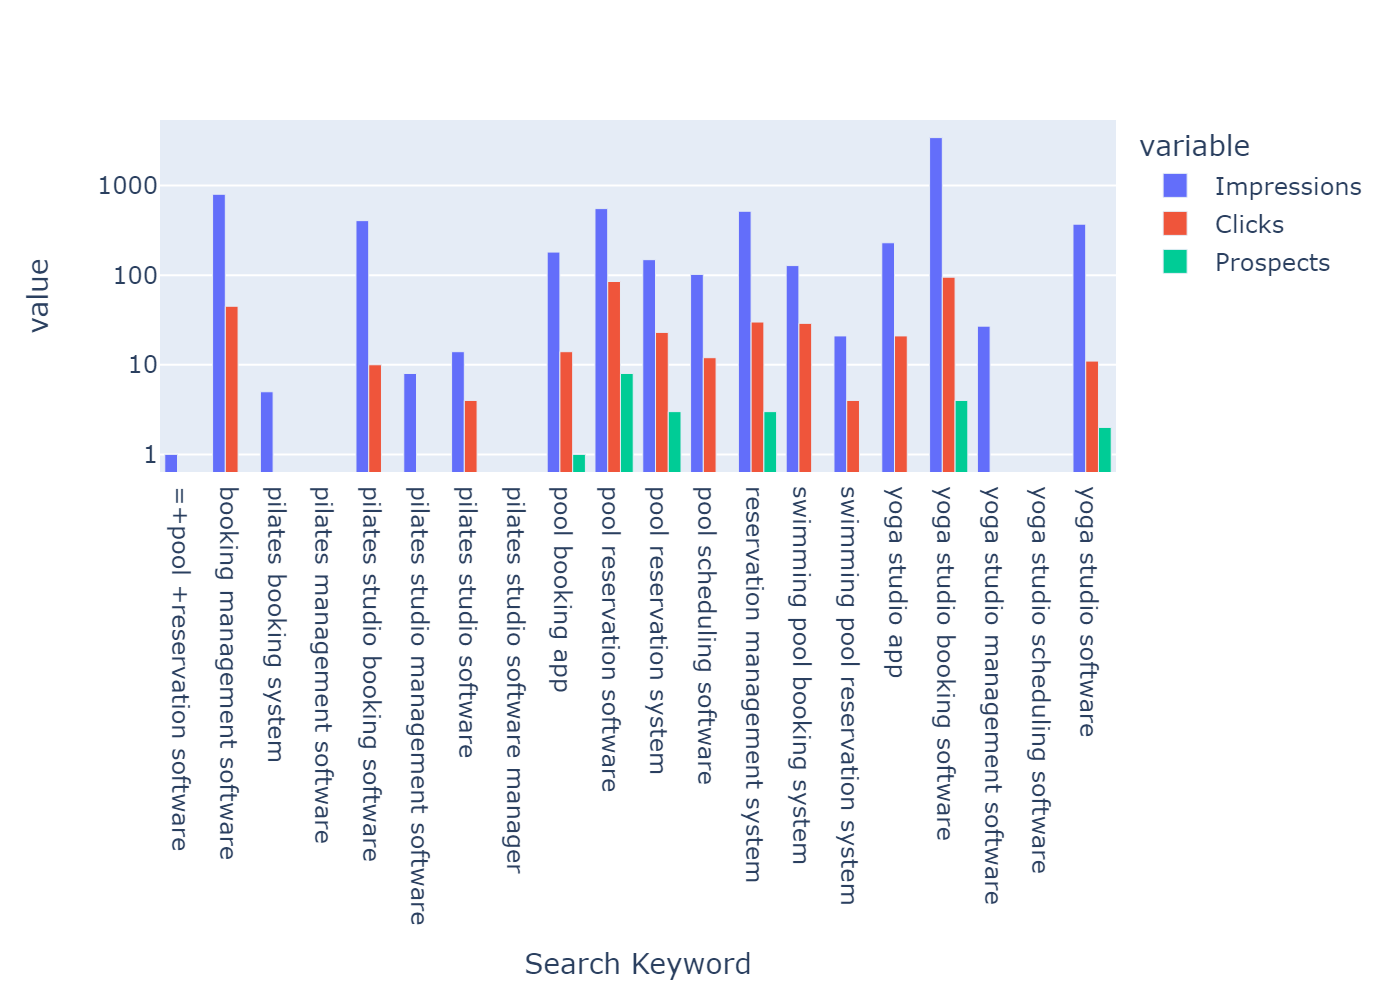

In [41]:
fig = px.bar(data_frame=df1, barmode='group', log_y=True)
Image(fig.to_image(format="png",scale=2))

### which campaign get more click or impression 

In [42]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Month'],
      dtype='object')

In [43]:
df1 = df[['Campaign', 'Clicks', 'Impressions']]
df1 = df1.groupby('Campaign').sum()
df1.head()

,Clicks,Impressions
Campaign,,
EK_Generic_Quad-Tok_Pilates,10,414
EK_Generic_Quad-Tok_Yoga,94,3423
EK_Generic_Quad-Tok_Yoga_Singapore,1,34
EK_Generic_Swimming,114,802
EK_Generic_Swimming_Canada,6,44


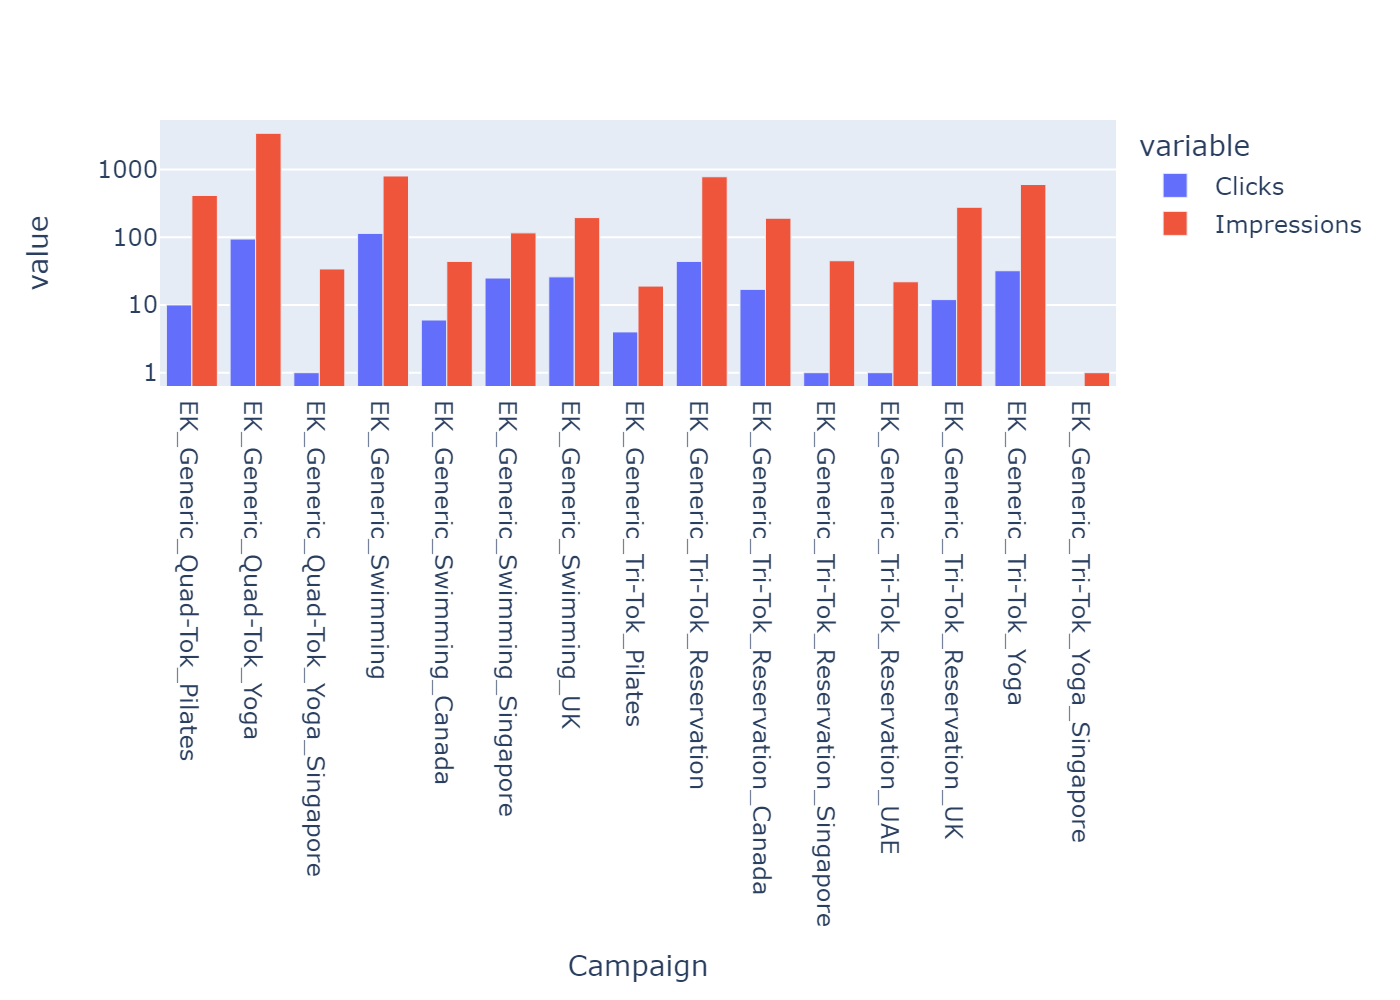

In [44]:
fig = px.bar(data_frame=df1, barmode='group', log_y=True)
Image(fig.to_image(format="png",scale=2))

### which add group is more click or impression

In [45]:
df1 = df[['Ad group', 'Impressions', 'Clicks', 'Prospects']]
df1 = df1.groupby('Ad group').sum()
df1.head()

,Impressions,Clicks,Prospects
Ad group,,,
Pilates_Booking_System_Exact,5,0,0
Pilates_Booking_System_Phrase,0,0,0
Pilates_Management_Software_Exact,0,0,0
Pilates_Studio_Booking_Software_Broad,406,10,0
Pilates_Studio_Management_Software_Exact,8,0,0


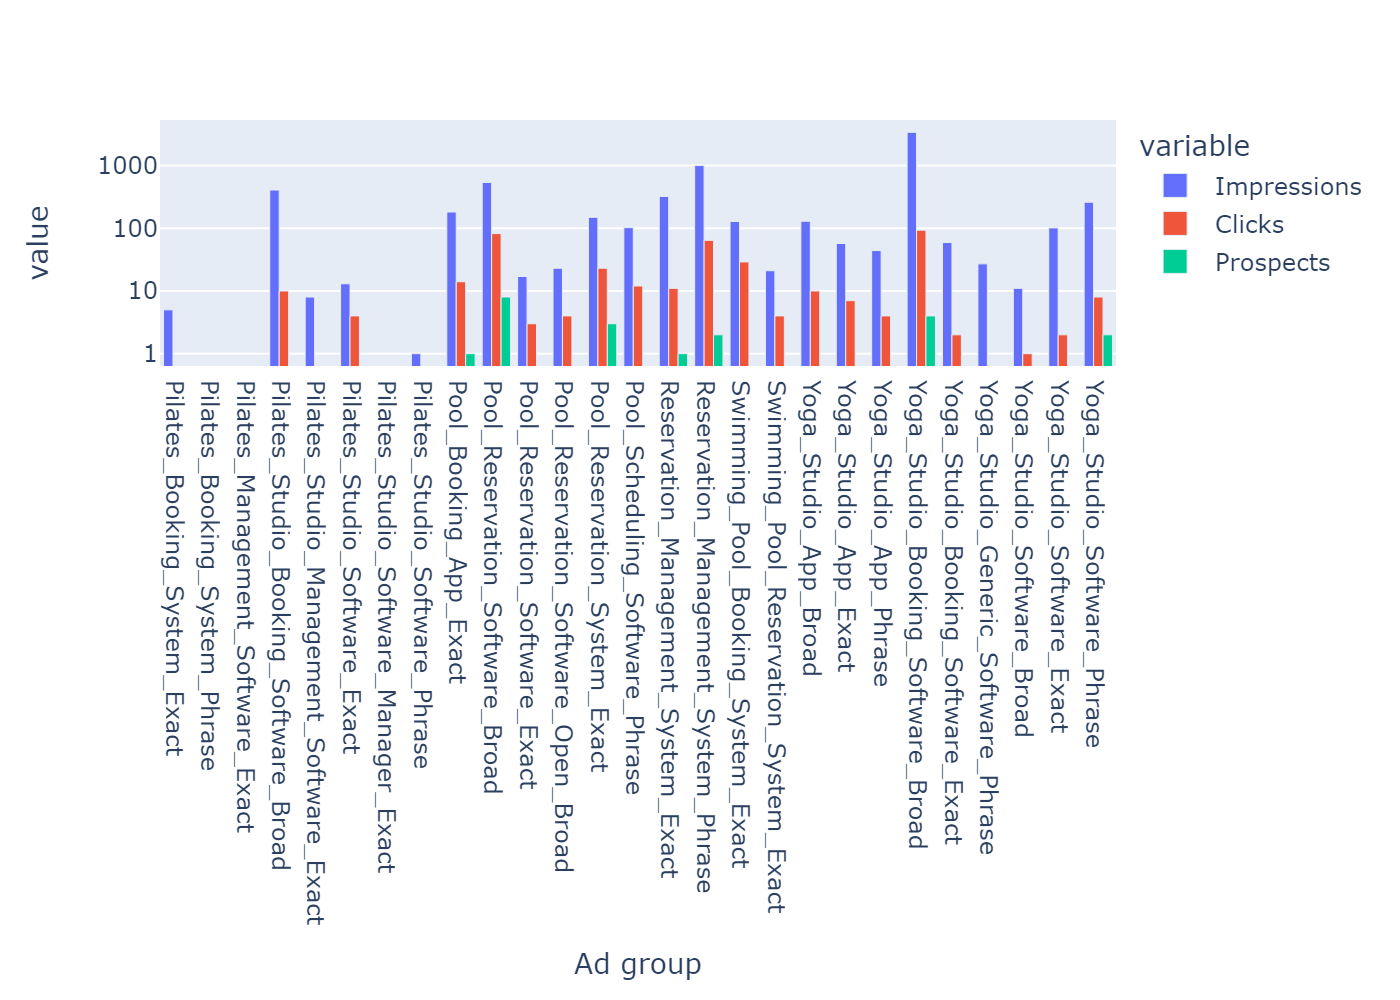

In [46]:
fig = px.bar(data_frame=df1, barmode='group', log_y=True)
Image(fig.to_image(format="png",scale=2))

### Which month is more Payment

In [47]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Month'],
      dtype='object')

In [48]:
df1 = df[['Month', 'Payment ($)']].groupby('Month').sum().reset_index()
df1

,Month,Payment ($)
0,1,2168.0
1,2,2768.0
2,3,3368.0
3,4,2388.0
4,5,1188.0


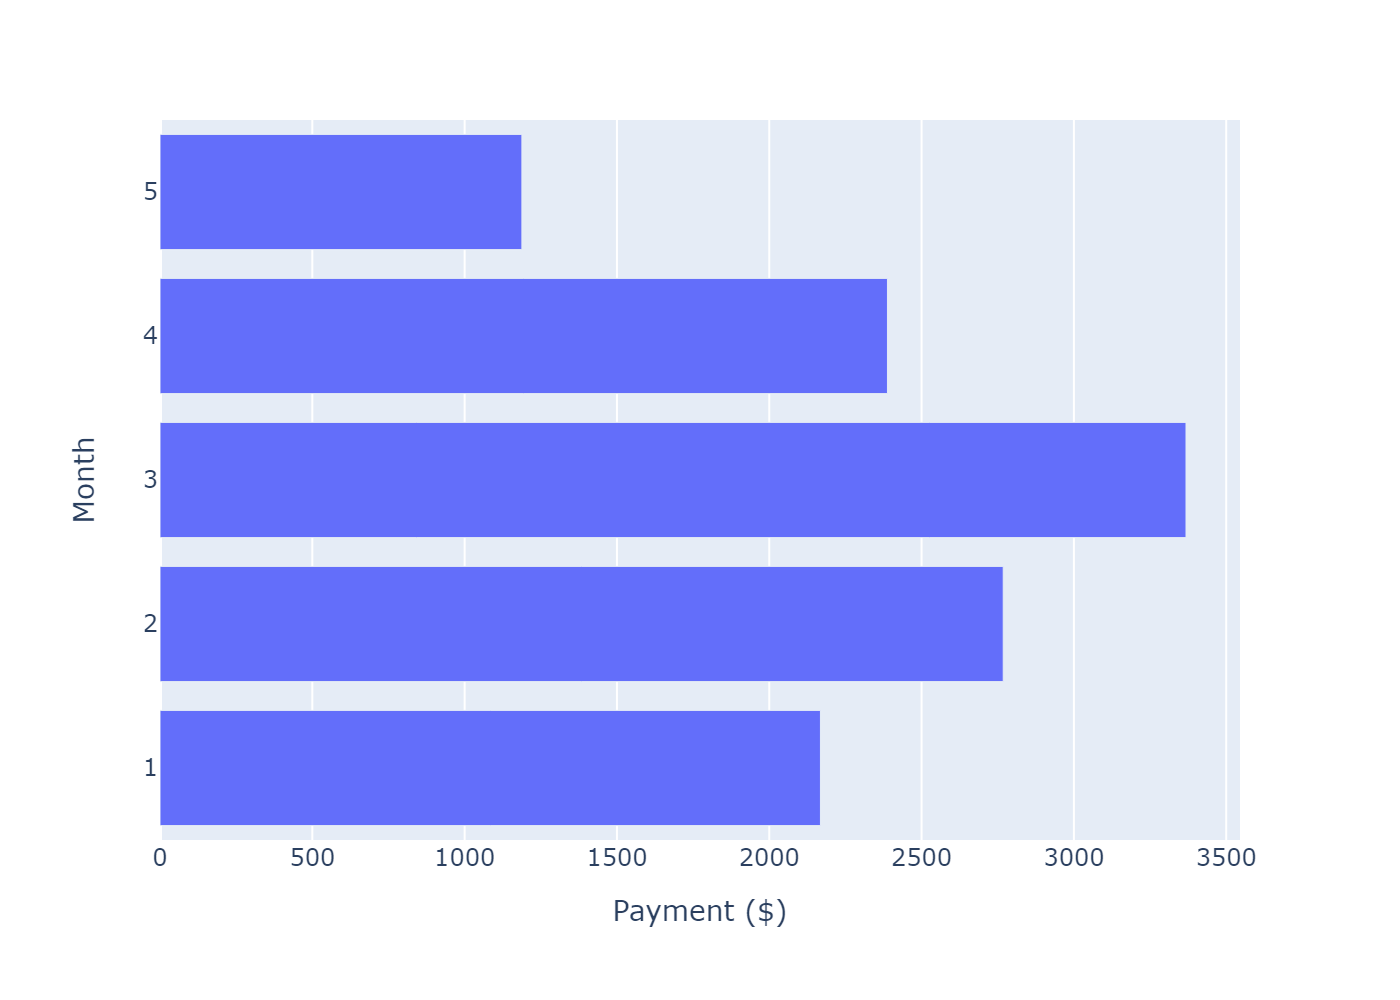

In [49]:
fig = px.bar(data_frame=df1, x='Payment ($)', y='Month', orientation='h')
Image(fig.to_image(format="png",scale=2))

### Analyse the Impact of geography

In [50]:
df.head(3)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1


In [51]:
df.Country.unique()

array(['USA'], dtype=object)

In [52]:
df.Currency.unique()

array(['USD'], dtype=object)

### Model

In [53]:
df.head(3)

,Week,Campaign,Ad group,Keyword type,Search Keyword,Currency,Clicks,Impressions,Cost ($),Leads,Prospects,Payment ($),Payment Date,Country,Month
0,2021-01-25,EK_Generic_Swimming,Pool_Reservation_System_Exact,Exact,pool reservation system,USD,2,17,38.33,0,1,980.0,2021-02-03,USA,1
1,2021-01-25,EK_Generic_Swimming,Pool_Booking_App_Exact,Exact,pool booking app,USD,1,13,11.70,0,0,0.0,NaT,USA,1
2,2021-01-25,EK_Generic_Quad-Tok_Yoga,Yoga_Studio_Booking_Software_Broad,Broad,yoga studio booking software,USD,4,154,45.13,0,1,1188.0,2021-03-13,USA,1


In [54]:
df.Week

0     2021-01-25
1     2021-01-25
2     2021-01-25
3     2021-01-25
4     2021-01-25
         ...    
413   2021-05-03
414   2021-05-03
415   2021-05-03
416   2021-05-03
417   2021-05-03
Name: Week, Length: 418, dtype: datetime64[ns]

In [55]:
df.columns

Index(['Week', 'Campaign', 'Ad group', 'Keyword type', 'Search Keyword',
       'Currency', 'Clicks', 'Impressions', 'Cost ($)', 'Leads', 'Prospects',
       'Payment ($)', 'Payment Date', 'Country', 'Month'],
      dtype='object')

In [56]:
df1 = df[['Week', 'Cost ($)']].groupby('Week').sum()
df1.head()

,Cost ($)
Week,
2021-01-25,154.79
2021-02-01,192.58
2021-02-08,216.13
2021-02-15,235.30
2021-02-22,190.90


In [57]:
len(df1)

15

C:\Users\vadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

C:\Users\vadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

C:\Users\vadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency W-MON will be used.

C:\Users\vadhi\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning:

Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.



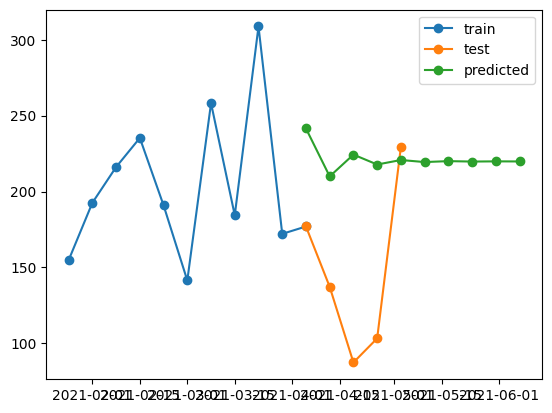

In [58]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df1.iloc[:10], order=(1, 1, 1))
model_fit = model.fit()
predictions = model_fit.forecast(steps=10)

plt.plot(df1.iloc[:11], 'o-', label='train')
plt.plot(df1.iloc[10:], 'o-', label='test')
plt.plot(predictions, 'o-', label='predicted')
plt.legend()
plt.show()

> **Note:** Because of this dataset is very small, we can't predict future values correctly.